In [51]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [193]:
def construct_matrix(file):
    freq_vec = defaultdict(int)
    for char in file.read():
        freq_vec[char.lower()] += 1  # this should include newlines

#     for line in lines:
#         for char in line:
#             freq_vec[char.lower()] += 1  # this should include newlines


    kept = {}
    for char, freq in freq_vec.items():
        if freq >= 88:
            kept[char] = freq

    freq_vec = kept
    idx2char = []
    char2idx = {}
    for char, freq in sorted(freq_vec.items(), key=lambda x: -x[1]):
        char2idx[char] = len(idx2char)
        idx2char.append(char)

    n = len(idx2char)
    freq_mat = np.zeros((n, n))
    prev = '\n'
    f.seek(0)
    for char in f.read():
        if prev in char2idx and char in char2idx:
            row = char2idx[prev]
            col = char2idx[char]
            freq_mat[row, col] += 1  # likewise as above
        prev = char
        
    for idx, char in enumerate(idx2char):
        if char == '\n':
            idx2char[idx] = r'\n'
        if char == ' ':
            idx2char[idx] = r'\s'
    return freq_mat, idx2char


def plot_matrix(A, ticks):
    fig,ax = plt.subplots(figsize=(8,8))
    ax.imshow(A)

    ax.set_xticks(range(len(A)))
    ax.set_yticks(range(len(A)))
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks)
    plt.show()

{'t': 12467, 'h': 8942, 'e': 16743, ' ': 28438, 'p': 2574, 'r': 8232, 'o': 11062, 'j': 203, 'c': 3663, 'g': 3394, 'u': 3853, 'n': 9012, 'b': 2221, 'k': 1170, 'f': 2835, 'a': 10362, 'i': 9463, 's': 8732, 'm': 3217, 'l': 5054, ',': 2906, 'y': 2632, 'd': 6220, '\n': 4238, 'w': 3370, 'v': 1152, '.': 1640, '-': 476, ':': 98, 'z': 88, "'": 456, '!': 411, ';': 370, '?': 159, 'x': 159, 'q': 108, '"': 1388}


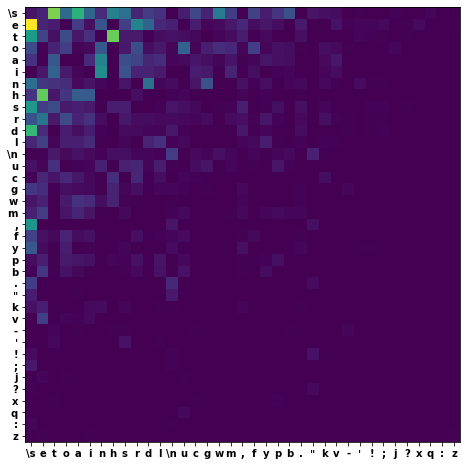

In [194]:
with open('christmas carol.txt') as f:
    A, ticks = construct_matrix(f)

plot_matrix(A, ticks)

In [197]:
print(A[1,1])

485.0


In [81]:
from scipy.spatial.distance import pdist, squareform
import numpy.linalg as lalg
from scipy.cluster.hierarchy import linkage, dendrogram

In [133]:
def embed_snapshot_markov(A, steps):
    '''embedding of pons & lapaty, including extra weighting using degrees'''
    # get markov matrix P
    n = len(A)
    D = np.identity(n) * np.sum(A, axis=1)
    P = lalg.inv(D) @ A
    
    # steps
    P = lalg.matrix_power(P, steps)
#     if degrees:
#         P = lalg.inv(sqrtm(D)) @ P
    return P

In [185]:
def cluster_walktrap(embedding, method='ward', opt_ord=False):
    dist = pdist(embedding, metric='euclidean')
#     dist = squareform(D)
    return linkage(dist, method=method, optimal_ordering=opt_ord)

In [186]:
def draw_dendrogram(Z, ticklabels, figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.rcParams["font.weight"] = "bold"
    dend = dendrogram(Z, leaf_rotation=0, leaf_font_size=15)

    ticks, labels = plt.xticks()
    if ticklabels is not None:
        labels = [ticklabels[int(l.get_text())] for l in labels]
        plt.xticks(ticks, labels)


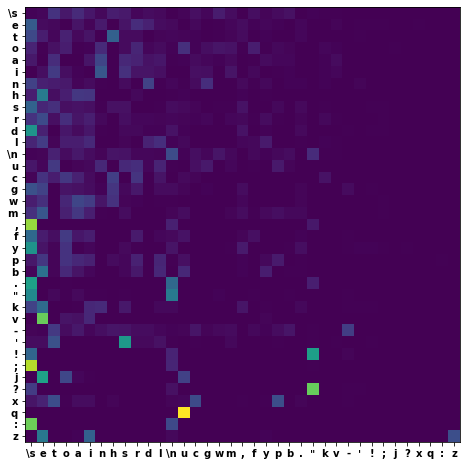

In [187]:
P = embed_snapshot_markov(A, 1)
plot_matrix(P, ticks)

In [ ]:
P = 1 - (P+P.T)/2
np.fill_diagonal(P, 0)
plot_matrix(P, ticks)

In [188]:
Z = cluster_walktrap(P, 'ward', True)

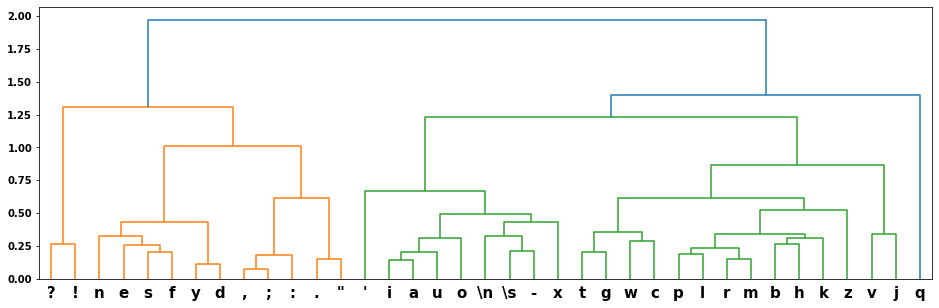

In [189]:
draw_dendrogram(Z, ticks)

# optimisation

In [ ]:
# branch and bound
def optimise(A):
    
    order = []
    
    def dfs(pos,)

In [190]:
# simulated annealing

In [ ]:
# genetic